# 1. Install Dependencies

In [1]:
!pip install opencv-python tensorflow mediapipe sklearn matplotlib

In [2]:
    import cv2
    import numpy as np
    import os
    from matplotlib import pyplot as plt
    import time
    import mediapipe as mp

# 2. Keypoints using MP

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model 
mp_drawing = mp.solutions.drawing_utils # Drawing utis

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Color convertion bgr to rgb
    image.flags.writeable = False                  # Image to non writtable
    results = model.process(image)                 #  Appilying model Pridection
    image.flags.writeable = True
    image  = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results
    

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
#                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
#                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
#                              ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [1]:
draw_landmarks(frame, results)

NameError: name 'draw_landmarks' is not defined

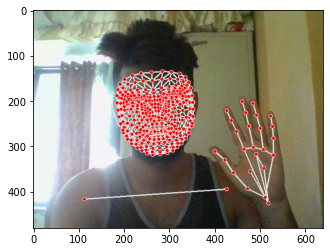

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [10]:
## 3. Extract Keypoint Values

In [11]:
len(results.left_hand_landmarks.landmark)

21

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
#face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    #face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 4.32993829e-01,  4.93621618e-01, -1.41808736e+00,  9.99983251e-01,
        4.59367186e-01,  4.04093802e-01, -1.34173512e+00,  9.99962330e-01,
        4.78395760e-01,  4.01085585e-01, -1.34165299e+00,  9.99973416e-01,
        4.94036287e-01,  3.99022281e-01, -1.34077597e+00,  9.99954224e-01,
        3.90599608e-01,  4.18466449e-01, -1.35612822e+00,  9.99949694e-01,
        3.65469992e-01,  4.22414869e-01, -1.35528839e+00,  9.99950290e-01,
        3.42892945e-01,  4.25643802e-01, -1.35547757e+00,  9.99907792e-01,
        5.19753754e-01,  4.23820585e-01, -8.52750897e-01,  9.99965191e-01,
        3.17145050e-01,  4.59193081e-01, -9.07358170e-01,  9.99973834e-01,
        4.73617166e-01,  5.65007389e-01, -1.23455215e+00,  9.99968648e-01,
        3.95143002e-01,  5.77737987e-01, -1.25302172e+00,  9.99973595e-01,
        6.68720901e-01,  8.21366608e-01, -4.88057435e-01,  9.98656213e-01,
        1.76716790e-01,  8.67890477e-01, -5.68899810e-01,  9.91088450e-01,
        8.85000348e-01,  

In [17]:
np.save('0', result_test)

In [38]:
np.load('0.npy')

array([ 3.33562046e-01,  4.23595637e-01, -1.20698810e+00,  9.99994695e-01,
        3.65335852e-01,  3.43453616e-01, -1.14894032e+00,  9.99989629e-01,
        3.85163844e-01,  3.39630067e-01, -1.14808393e+00,  9.99991059e-01,
        4.02030230e-01,  3.37487966e-01, -1.14661646e+00,  9.99988616e-01,
        2.99852103e-01,  3.57710212e-01, -1.13368678e+00,  9.99982178e-01,
        2.78433889e-01,  3.61142635e-01, -1.13306916e+00,  9.99980807e-01,
        2.60520041e-01,  3.64601582e-01, -1.13250470e+00,  9.99973118e-01,
        4.29665416e-01,  3.65565151e-01, -7.30934501e-01,  9.99992609e-01,
        2.42545843e-01,  3.96027774e-01, -6.47622824e-01,  9.99978662e-01,
        3.82430792e-01,  4.85551298e-01, -1.04343390e+00,  9.99987602e-01,
        2.99473941e-01,  5.01197457e-01, -1.02193141e+00,  9.99973595e-01,
        6.04119420e-01,  7.52824545e-01, -4.56545979e-01,  9.99725401e-01,
        1.23619214e-01,  7.86747754e-01, -3.85430217e-01,  9.98447359e-01,
        8.05482268e-01,  

# 4. Setup folder for collection 

In [18]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks','indian','sign','language','man','women','deaf','teacher','sorry'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 2

In [43]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [44]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [45]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [19]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [20]:
label_map = {label:num for num, label in enumerate(actions)}

In [21]:
label_map

{'hello': 0,
 'thanks': 1,
 'indian': 2,
 'sign': 3,
 'language': 4,
 'man': 5,
 'women': 6,
 'deaf': 7,
 'teacher': 8,
 'sorry': 9}

In [22]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [23]:
X = np.array(sequences)
X.shape


(300, 30, 258)

In [24]:
np.array(labels).shape


(300,)

In [25]:
y = to_categorical(labels).astype(int)

In [26]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [27]:
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.05)

In [28]:
x_train.shape

(285, 30, 258)

In [29]:
y_test.shape

(15, 10)

# Build and train LSTM Neural Network

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [19]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [31]:
model = Sequential()
model.add(LSTM(64,return_sequences=True, activation='relu', input_shape = (30,258)))
model.add(LSTM(128,return_sequences=True, activation='relu'))
model.add(LSTM(64,return_sequences=False, activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(actions.shape[0],activation='softmax'))


In [32]:
X.shape

(300, 30, 258)

In [33]:
model.compile(optimizer = 'Adam', loss= 'categorical_crossentropy', metrics = ['categorical_accuracy'])

In [25]:
model.fit(x_train,y_train,epochs = 200,callbacks= [tb_callback])

Epoch 1/200
9/9 [==============================] - 11s 41ms/step - loss: 2.2949 - categorical_accuracy: 0.1263
Epoch 2/200
9/9 [==============================] - 0s 41ms/step - loss: 2.1945 - categorical_accuracy: 0.1825
Epoch 3/200
9/9 [==============================] - 0s 41ms/step - loss: 2.0977 - categorical_accuracy: 0.1930
Epoch 4/200
9/9 [==============================] - 0s 42ms/step - loss: 2.0011 - categorical_accuracy: 0.2140
Epoch 5/200
9/9 [==============================] - 0s 41ms/step - loss: 1.7470 - categorical_accuracy: 0.2702
Epoch 6/200
9/9 [==============================] - 0s 41ms/step - loss: 1.7020 - categorical_accuracy: 0.3088
Epoch 7/200
9/9 [==============================] - 0s 42ms/step - loss: 1.4361 - categorical_accuracy: 0.3579
Epoch 8/200
9/9 [==============================] - 0s 42ms/step - loss: 1.3480 - categorical_accuracy: 0.3614
Epoch 9/200
9/9 [==============================] - 0s 41ms/step - loss: 1.2865 - categorical_accuracy: 0.4105
Epoch 10/

9/9 [==============================] - 0s 45ms/step - loss: 0.2665 - categorical_accuracy: 0.9053
Epoch 148/200
9/9 [==============================] - 0s 45ms/step - loss: 0.2127 - categorical_accuracy: 0.9368
Epoch 149/200
9/9 [==============================] - 0s 43ms/step - loss: 0.1807 - categorical_accuracy: 0.9439
Epoch 150/200
9/9 [==============================] - 0s 42ms/step - loss: 0.1544 - categorical_accuracy: 0.9404
Epoch 151/200
9/9 [==============================] - 0s 44ms/step - loss: 0.1648 - categorical_accuracy: 0.9368
Epoch 152/200
9/9 [==============================] - 0s 44ms/step - loss: 0.1743 - categorical_accuracy: 0.9228
Epoch 153/200
9/9 [==============================] - 0s 43ms/step - loss: 0.2228 - categorical_accuracy: 0.9088
Epoch 154/200
9/9 [==============================] - 0s 42ms/step - loss: 0.3373 - categorical_accuracy: 0.8596
Epoch 155/200
9/9 [==============================] - 0s 43ms/step - loss: 0.2326 - categorical_accuracy: 0.9088
Epoch 

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            82688     
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 237,482
Trainable params: 237,482
Non-trai

# Making Prediction

In [27]:
res = model.predict(x_test)

1/1 [==============================] - 5s 5s/step


In [28]:
actions[np.argmax(res[0])]

'sorry'

In [29]:
actions[np.argmax(y_test[0])]

'sorry'

# Save the model

In [30]:
model.save('action.final')

INFO:tensorflow:Assets written to: action.final\assets


In [33]:
del model



In [34]:

model.load_weights('action.final')

# Model evaluation using Confusion matrix and accuracy

In [35]:
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score

In [36]:
yhat = model.predict(x_train)

9/9 [==============================] - 1s 14ms/step


In [37]:
y_true = np.argmax(y_train,axis=1).tolist()
yhat = np.argmax(yhat,axis=1).tolist()

In [38]:
yhat

[2,
 8,
 1,
 8,
 9,
 2,
 0,
 3,
 2,
 8,
 8,
 0,
 7,
 0,
 4,
 2,
 3,
 4,
 0,
 4,
 1,
 0,
 4,
 9,
 1,
 0,
 9,
 0,
 9,
 5,
 6,
 2,
 2,
 4,
 0,
 3,
 8,
 6,
 8,
 6,
 5,
 0,
 7,
 4,
 0,
 7,
 1,
 4,
 0,
 9,
 3,
 0,
 9,
 1,
 4,
 8,
 6,
 6,
 8,
 0,
 9,
 9,
 8,
 4,
 3,
 2,
 3,
 1,
 1,
 9,
 3,
 5,
 3,
 2,
 4,
 3,
 6,
 9,
 6,
 6,
 9,
 6,
 6,
 5,
 8,
 9,
 4,
 0,
 7,
 7,
 3,
 0,
 5,
 9,
 1,
 4,
 2,
 0,
 6,
 1,
 1,
 2,
 4,
 9,
 2,
 2,
 8,
 6,
 7,
 7,
 3,
 5,
 0,
 7,
 3,
 9,
 6,
 7,
 4,
 3,
 6,
 9,
 5,
 1,
 6,
 1,
 1,
 4,
 0,
 5,
 2,
 7,
 8,
 2,
 9,
 6,
 3,
 1,
 0,
 5,
 1,
 9,
 2,
 1,
 0,
 5,
 0,
 0,
 5,
 0,
 6,
 0,
 6,
 7,
 9,
 5,
 4,
 8,
 7,
 4,
 8,
 5,
 3,
 3,
 7,
 2,
 4,
 0,
 1,
 8,
 5,
 3,
 7,
 2,
 0,
 7,
 7,
 1,
 3,
 3,
 2,
 5,
 5,
 4,
 1,
 6,
 4,
 5,
 6,
 8,
 8,
 4,
 2,
 8,
 7,
 7,
 8,
 4,
 4,
 5,
 3,
 3,
 9,
 8,
 5,
 7,
 1,
 8,
 5,
 0,
 7,
 7,
 5,
 8,
 3,
 5,
 1,
 5,
 1,
 1,
 9,
 3,
 3,
 0,
 1,
 6,
 3,
 9,
 9,
 4,
 3,
 8,
 2,
 2,
 6,
 7,
 2,
 8,
 9,
 3,
 2,
 6,
 5,
 3,
 2,
 8,
 1,
 5,
 4,
 4,


In [39]:
multilabel_confusion_matrix(y_true,yhat)

array([[[257,   0],
        [  0,  28]],

       [[257,   0],
        [  0,  28]],

       [[256,   0],
        [  0,  29]],

       [[255,   0],
        [  0,  30]],

       [[257,   1],
        [  0,  27]],

       [[257,   0],
        [  1,  27]],

       [[257,   0],
        [  0,  28]],

       [[257,   0],
        [  0,  28]],

       [[256,   0],
        [  0,  29]],

       [[255,   0],
        [  0,  30]]], dtype=int64)

In [40]:
accuracy_score(y_true,yhat)

0.9964912280701754

# Test In real life

In [53]:
from scipy import stats

In [54]:
colors = [(245,117,16), (117,245,16), (16,117,245),(255,0,0),(0,255,0),(0,0,255),(255,255,0),(255,0,255),(0,255,255),(44,255,255)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

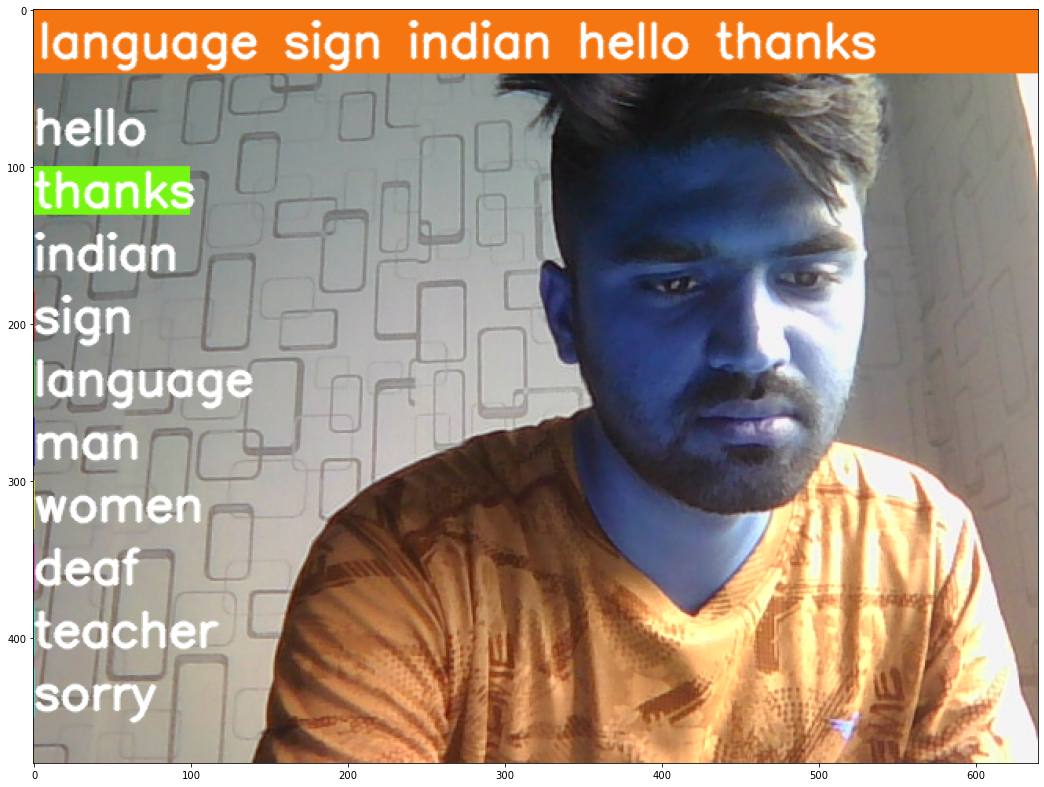

In [64]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [62]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.4

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        #draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 27ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
sign
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 25ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
sign
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 26ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
sign
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 25ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
sign
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
language
<class 'mediapipe.python.so

1/1 [==============================] - 0s 26ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
thanks
<class 'media

In [47]:
cap.release()
cv2.destroyAllWindows()

# Extend dataset

In [ ]:
from streamlit_webrtc import webrtc_streamer
import av


class videoProcessor:
    def recv(self,frame):
        frm = frame.to_ndarray(format="bgr24")
        return av.VideoFrame.from_ndarray(frm, format='bgr24')

webrtc_streamer(key ="Sign", video_processor_factory=videoProcessor)
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utis

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Color convertion bgr to rgb
    image.flags.writeable = False                  # Image to non writtable
    results = model.process(image)                 #  Appilying model Pridection
    image.flags.writeable = True
    image  = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

def draw_styled_landmarks(image, results):
    # Draw face connections
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
#                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
#                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
#                              )
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    #face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,lh, rh])

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['hello', 'thanks','indian','sign','language','man','women','deaf','teacher','sorry'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 2


# Show final output

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utis

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Color convertion bgr to rgb
    image.flags.writeable = False                  # Image to non writtable
    results = model.process(image)                 #  Appilying model Pridection
    image.flags.writeable = True
    image  = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

def draw_styled_landmarks(image, results):
    # Draw face connections
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
#                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
#                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
#                              )
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    #face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,lh, rh])

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['hello', 'thanks','indian','sign','language','man','women','deaf','teacher','sorry'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 2

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

label_map = {label:num for num, label in enumerate(actions)}

label_map
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

X = np.array(sequences)
y = to_categorical(labels).astype(int)
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.05)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

model = Sequential()
model.add(LSTM(64,return_sequences=True, activation='relu', input_shape = (30,258)))
model.add(LSTM(128,return_sequences=True, activation='relu'))
model.add(LSTM(64,return_sequences=False, activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(actions.shape[0],activation='softmax'))


model.compile(optimizer = 'Adam', loss= 'categorical_crossentropy', metrics = ['categorical_accuracy'])

model.summary()

model.load_weights('action.final')

from scipy import stats

colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245), (255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0),
          (255, 0, 255), (0, 255, 255), (44, 255, 255)]


def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2,
                    cv2.LINE_AA)

    return output_frame


# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.4

cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        # draw_styled_landmarks(image, results)

        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

            # 3. Viz logic
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:

                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            82688     
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 237,482
Trainable params: 237,482
Non-trai

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
language
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
language
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
language
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
language
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
language
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
language
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
language
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
language
<class 'mediapipe.python.solution_base.SolutionOutputs'>

In [ ]:
cap.release()
cv2.destroyAllWindows()